In [11]:
from sbmfi.models.build_models import build_e_coli_anton_glc, read_anton_fluxes
from sbmfi.models.small_models import spiro
from sbmfi.inference.simulator import MCMC, simulate_prior_predictive
from sbmfi.inference.priors import UniFluxPrior
import arviz as az
import multiprocessing as mp
import psutil
# import holoviews as hv
import numpy as np
from sbmfi.core.polytopia import fast_FVA, V_representation
from scipy.spatial import ConvexHull
# az.rcParams["plot.density_kind"] = "hist"
# hv.extension('matplotlib')

import matplotlib

In [12]:
up._fcm.logit_xch_fluxes


False

In [3]:
model, kwargs = spiro(
    backend='torch',
    batch_size=3, which_measurements='com', build_simulator=True, which_labellings=list('CD'),
    v2_reversible=True, logit_xch_fluxes=False, include_bom=False, seed=None
)
sdf = kwargs['substrate_df']
datasetsim = kwargs['datasetsim']
simm = datasetsim._obmods
bom = datasetsim._bom

up = UniFluxPrior(model, cache_size=25000)

mcmc = MCMC(
    model=model,
    substrate_df=sdf,
    mdv_observation_models=simm,
    boundary_observation_model=bom,
    prior=up,
)
mcmc.set_measurement(x_meas=kwargs['measurements'])
mcmc.set_true_theta(theta=kwargs['theta'])
algo = 'mh'
run_kwargs = dict(
    n=20000, n_burn=1000, n_chains=4, thinning_factor=3, n_cdf=4, return_post_pred=True, line_proposal_std=5.0,
    evaluate_prior=True, algorithm=algo
)

post = mcmc.run(**run_kwargs)
simulate_prior_predictive(mcmc, post, num_processes=0)
az.to_netcdf(post, filename=f'spiro_{algo}.nc')

D D here


100%|████████████████████████████████████████████████████████| 41000/41000 [04:50<00:00, 140.92it/s]


'spiro_mh.nc'

In [13]:
model._fcm.theta_id

Index(['B_svd0', 'B_svd1', 'B_svd2', 'B_svd3', 'S_v2_xch'], dtype='object')

In [10]:
mcmc.true_theta

B_svd0     -0.789858
B_svd1      0.879253
B_svd2      1.961508
B_svd3      1.745831
S_v2_xch    0.500000
Name: v, dtype: float64

In [3]:
# nc_file = "C:\python_projects\sbmfi\src\sbmfi\inference\e_coli_anton_glc7_prior.nc"
nc_file=f'spiro_mh.nc'
post = az.from_netcdf(nc_file)
# az.plot_trace(post, compact=False)

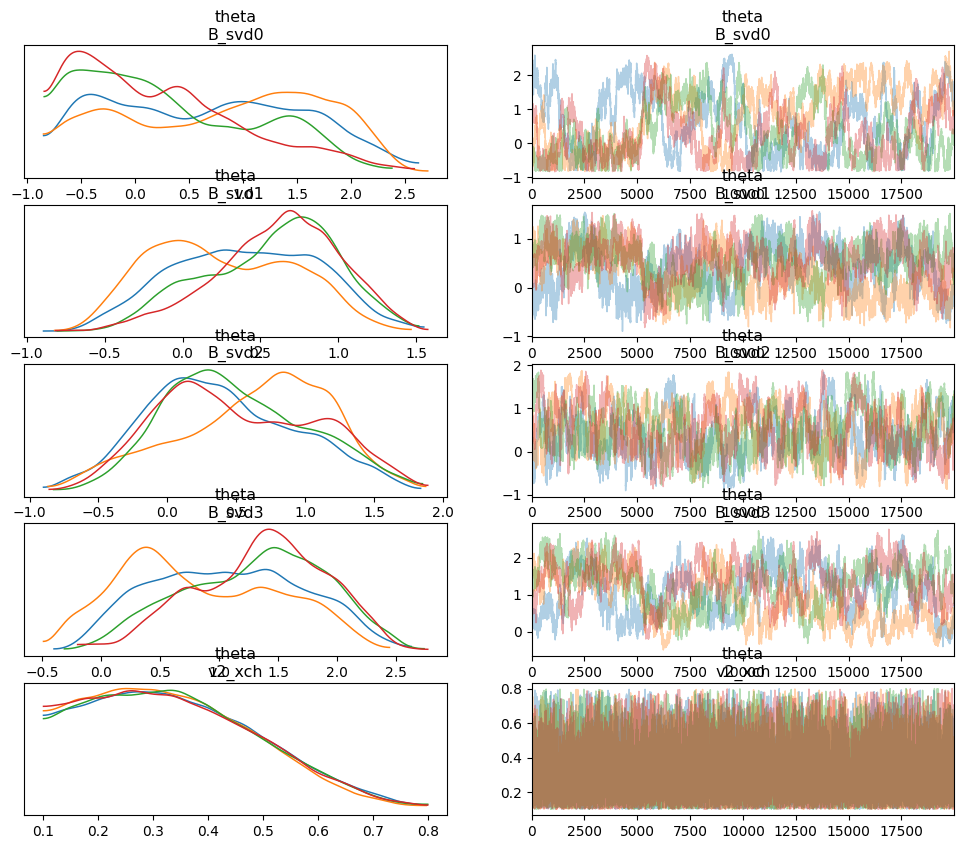

In [21]:
import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([1,1,1,1])

nc_file=f'spiro_cdf.nc'
post2 = az.from_netcdf(nc_file)
axes = az.plot_trace(post2, compact=False)
fig = axes.ravel()[0].figure
fig.savefig('test.png')


<Axes: xlabel='observed_data / simulated_data'>

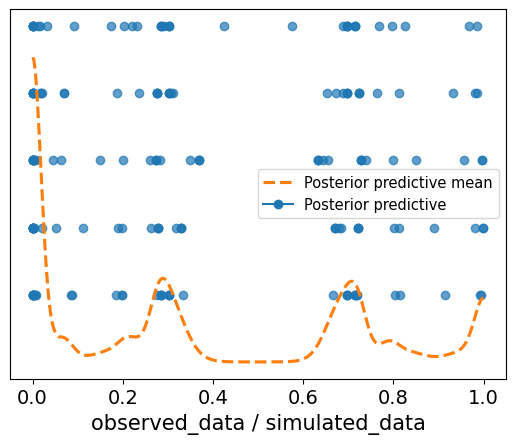

In [9]:
coord = post.posterior_predictive.coords['data_id'].values[7]
az.plot_ppc(
    post,
    kind='scatter',
    data_pairs={'observed_data': 'simulated_data'},
    observed=False,
)

array([[<Axes: title={'center': 'theta\n0, B_svd0'}>,
        <Axes: title={'center': 'theta\n0, B_svd1'}>,
        <Axes: title={'center': 'theta\n0, B_svd2'}>,
        <Axes: title={'center': 'theta\n0, B_svd3'}>],
       [<Axes: title={'center': 'theta\n0, v2_xch'}>,
        <Axes: title={'center': 'theta\n1, B_svd0'}>,
        <Axes: title={'center': 'theta\n1, B_svd1'}>,
        <Axes: title={'center': 'theta\n1, B_svd2'}>],
       [<Axes: title={'center': 'theta\n1, B_svd3'}>,
        <Axes: title={'center': 'theta\n1, v2_xch'}>,
        <Axes: title={'center': 'theta\n2, B_svd0'}>,
        <Axes: title={'center': 'theta\n2, B_svd1'}>],
       [<Axes: title={'center': 'theta\n2, B_svd2'}>,
        <Axes: title={'center': 'theta\n2, B_svd3'}>,
        <Axes: title={'center': 'theta\n2, v2_xch'}>,
        <Axes: title={'center': 'theta\n3, B_svd0'}>],
       [<Axes: title={'center': 'theta\n3, B_svd1'}>,
        <Axes: title={'center': 'theta\n3, B_svd2'}>,
        <Axes: title={'c

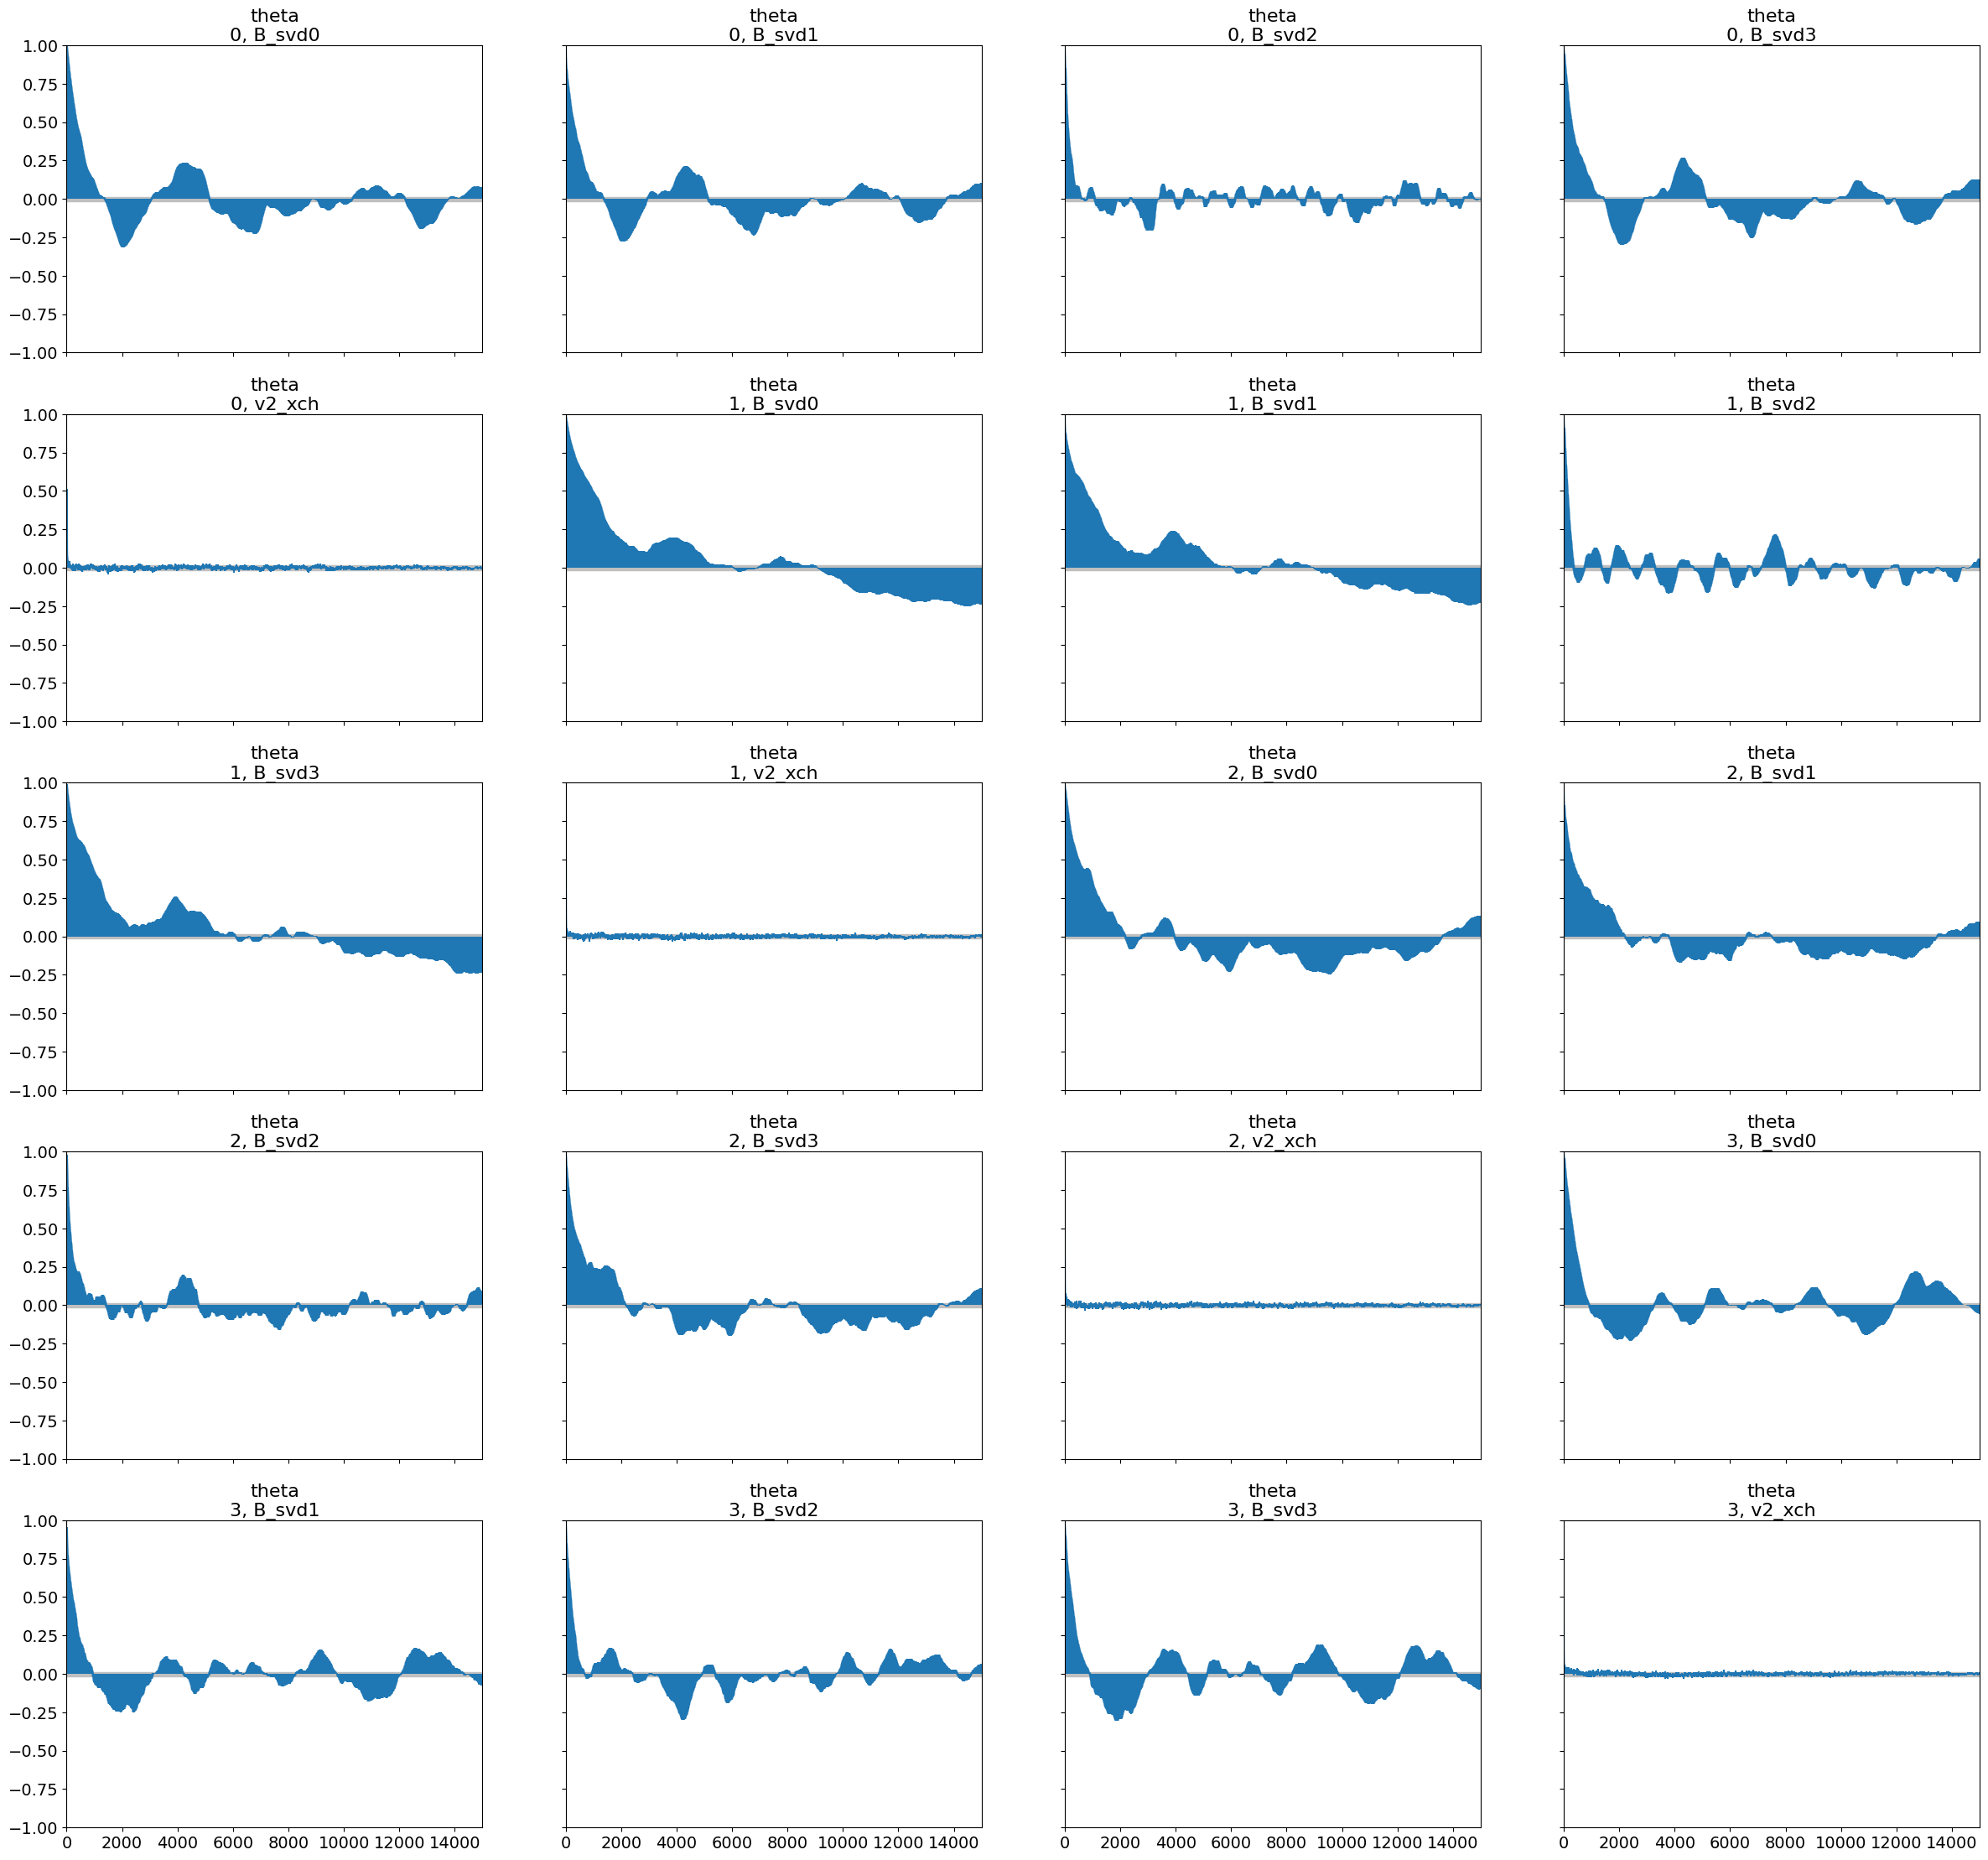

In [24]:
az.plot_autocorr(
    post2,max_lag=
)

In [ ]:

# data = az.load_arviz_data("non_centered_eight")

# data

In [2]:
f = read_anton_fluxes()

In [3]:
model, kwargs = build_e_coli_anton_glc(backend='numpy', build_simulator=True, batch_size=5, which_measurements='anton')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-09


In [4]:
sdf = kwargs['substrate_df']
simm = kwargs['datasetsim']._obmods
bom = kwargs['datasetsim']._bom
up = UniFluxPrior(model)
mcmc = MCMC(
    model=model,
    substrate_df=sdf,
    mdv_observation_models=simm,
    prior=up,
    boundary_observation_model=bom
)
mcmc.set_measurement(x_meas=kwargs['measurements'])
polytope = mcmc._sampler._F_round

In [7]:
vars = post.posterior_predictive.variables['data_id'].values[[5,20,55]]
az.plot_ppc(post, data_pairs={'observed_data': 'simulated_data'}, kind='cumulative', coords={'data_id': vars})


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000014EDD9309D0> (for post_execute):



KeyboardInterrupt



In [10]:
v_rep = V_representation(polytope, number_type='fraction')

In [56]:
v_rep.loc[:, [var1_id, var2_id]].sort_values(by=var1_id)



pol_area * pol_curve



:Overlay
   .Area.Polytope :Area   [B_svd3]   (B_svd1)
   .Curve.I       :Curve   [B_svd3]   (B_svd1)

In [19]:
def plot_monster(
    inference_data,
    var1_id,
    var2_id=None,
    group='prior',
    n=50000,
    polytope=None,
    pol_vrep=None,
    convex_hull=True,
    plot_true_theta=False,
):
    coords = [var1_id]
    if var2_id is not None:
        coords.append(var2_id)
    plot_data = az.extract(
        post, 
        group=group, 
        var_names='theta', 
        num_samples=n, 
        combined=True,
        keep_dataset=False, 
        rng=True).loc[coords].values

    if var2_id is None:
        plots = []
        kdim = var1_id
        if polytope is not None:
            fva_df = fast_FVA(polytope)
            min_line = hv.VLine(fva_df.loc[var1_id, 'min'], label='min').opts(color='#000000', line_dash='dashed')
            max_line = hv.VLine(fva_df.loc[var1_id, 'max'], label='max').opts(color='#000000', line_dash='dashed')
            kdim = hv.Dimension(var1_id, range=tuple(fva_df.loc[var1_id].values + np.array([-.5, .5])))
            plots.extend([min_line, max_line])
        plots.append(
            hv.Distribution(plot_data[0,:], kdims=[kdim], label=group).opts(width=800, height=800, bandwidth=0.1)
        )
        plot = hv.Overlay(plots[::-1])
        return plot
    else:
        pol_verts = pol_vrep.loc[:, [var1_id, var2_id]].drop_duplicates()
        pol_hull = ConvexHull(pol_verts.values)
        pol_verts = pol_hull.vertices.copy()
        pol_verts = np.concatenate([pol_verts, [pol_verts[0]]])
        
        pol_area = hv.Area(pol_hull.points[pol_verts], kdims=[var1_id], vdims=[var2_id], label='polytope').opts(alpha=0.2, show_legend=True, show_grid=True)
        pol_curve = hv.Curve(pol_hull.points[pol_verts], kdims=[var1_id], vdims=[var2_id])

        

    return plot_data


# plot_monster(post, var1_id='B_svd1', var2_id='B_svd0')

plots = []
var1_id = 'B_svd3'
var2_id = 'B_svd1'
# var2_id = None
polytope = mcmc._sampler._F_round

for group in ['prior', 'posterior']:
    plots.append(
        plot_monster(post, group=group, var1_id=var1_id, var2_id=var2_id, polytope=polytope, pol_vrep=v_rep)
    )
hv.Overlay(plots)



AttributeError: 'numpy.float64' object has no attribute 'startswith'

In [57]:
type(post.sel(group='posterior', theta_id=['B_svd0', 'B_svd1']))

arviz.data.inference_data.InferenceData

awkkegawejg $a=2$


KeyError: 'var names: "[\'measured_data\'] are not present" in dataset'

In [62]:
post

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

In [46]:
post.sel(theta_id=['B_svd0', 'B_svd1'])

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

In [38]:
post.sel(group='posterior', theta_id=['B_svd0', 'B_svd1']).to_array().values[0,0,-1,:]

AttributeError: 'InferenceData' object has no attribute 'to_array'

In [8]:
kwargs['thermo_fluxes']

,NADH16,CYTBD,ATPS4r,NADTRHD,THD2,ATPM,ADK1,O2t,EX_o2_e,NH4t,...,ACONTb_xch,ICDHyr_xch,SUCOAS_xch,SUCDi_xch,FUM_xch,MDH_xch,PTAr_xch,ACKr_xch,GHMT2r_xch,GLYCL_xch
COMPLETE-MFA,27.469312,28.560956,56.380869,-53.433656,-48.049581,45.05289,0.735044,14.280478,-14.280478,5.238596,...,0.19921,0.638363,0.001,0.982574,0.84885,0.999,0.632023,0.999,0.470994,0.001


In [7]:
kwargs['theta'].iloc[:, :12]

,B_svd0,B_svd1,B_svd2,B_svd3,B_svd4,B_svd5,B_svd6,B_svd7,B_svd8,B_svd9,B_svd10,PGI_xch
COMPLETE-MFA,418.929557,10.788526,85.966975,182.51379,-170.615313,995.947686,170.898763,-1185.108994,344.353046,-261.27746,99.868614,0.75216


In [60]:
az.extract_dataset(post, num_samples=None)

C:\Users\SYSBCPU\AppData\Local\Temp\ipykernel_24072\640168232.py:1: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(post, num_samples=None)


<xarray.Dataset>
Dimensions:   (theta_id: 36, sample: 100000)
Coordinates:
  * theta_id  (theta_id) object 'B_svd0' 'B_svd1' ... 'GHMT2r_xch' 'GLYCL_xch'
  * sample    (sample) object MultiIndex
  * chain     (sample) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3 3
  * draw      (sample) int32 0 1 2 3 4 5 ... 24994 24995 24996 24997 24998 24999
Data variables:
    theta     (theta_id, sample) float64 0.0 0.3664 0.4229 ... 0.1671 0.3534
Attributes:
    created_at:     2023-07-19T14:43:38.305865
    arviz_version:  0.15.1

In [7]:
pldf = model._fcm.map_theta_2_fluxes(post.posterior.param.values[0, 100:], return_thermo=True, pandalize=True)

In [8]:
pldf.head()

,NADH16,CYTBD,ATPS4r,NADTRHD,THD2,ATPM,ADK1,O2t,EX_o2_e,NH4t,...,ACONTb_xch,ICDHyr_xch,SUCOAS_xch,SUCDi_xch,FUM_xch,MDH_xch,PTAr_xch,ACKr_xch,GHMT2r_xch,GLYCL_xch
0,35.404755,39.240072,35.779986,10.701502,16.387352,21.298528,0.640066,19.620036,-19.620036,4.561699,...,0.339154,0.369680,0.320949,0.761324,0.128085,0.653545,0.687080,0.736889,0.370827,0.887766
1,34.812375,38.436618,29.244567,22.313133,27.790695,17.036476,0.636498,19.218309,-19.218309,4.536268,...,0.189142,0.090304,0.203551,0.850470,0.175692,0.899021,0.811418,0.356322,0.465778,0.893661
2,34.393049,37.820132,31.357423,16.917834,22.300418,17.813778,0.639275,18.910066,-18.910066,4.556059,...,0.249235,0.224757,0.115017,0.817173,0.113375,0.789319,0.321937,0.430710,0.479262,0.771367
3,31.732462,34.806490,25.794782,19.010906,26.323409,12.175141,0.653497,17.403245,-17.403245,4.657423,...,0.994946,0.168541,0.183669,0.748557,0.215813,0.863689,0.120753,0.465258,0.247441,0.855191
4,33.897941,37.329431,23.143322,32.406076,37.558396,8.848191,0.630090,18.664715,-18.664715,4.490598,...,0.028202,0.079084,0.473605,0.633724,0.221549,0.792039,0.382235,0.213178,0.194872,0.957581


In [5]:
kwargs['thermo_fluxes']

,NADH16,CYTBD,ATPS4r,NADTRHD,THD2,ATPM,ADK1,O2t,EX_o2_e,NH4t,...,ACONTb_xch,ICDHyr_xch,SUCOAS_xch,SUCDi_xch,FUM_xch,MDH_xch,PTAr_xch,ACKr_xch,GHMT2r_xch,GLYCL_xch
COMPLETE-MFA,27.469312,28.560956,56.380869,-53.433656,-48.049581,45.05289,0.735044,14.280478,-14.280478,5.238596,...,0.19921,0.638363,0.001,0.982574,0.84885,0.999,0.632023,0.999,0.470994,0.001


In [11]:
hv.Distribution(pldf['EX_ac_e']).opts(xrotation=90)

:Distribution   [EX_ac_e]   (Density)

In [7]:
mcmc.measurements


labelling_id      20% [U]Glc                                                  \
data_id      ala__L_c_{M-}+0 ala__L_c_{M-}+1 ala__L_c_{M-}+2 ala__L_c_{M-}+3   
anton               0.751121         0.04903         0.03119        0.168659   

labelling_id                                              \
data_id      ala__L_c|[1,2]_{M-}+0 ala__L_c|[1,2]_{M-}+1   
anton                     0.766126              0.040478   

labelling_id                                                        \
data_id      ala__L_c|[1,2]_{M-}+2 asp__L_c_{M-}+0 asp__L_c_{M-}+1   
anton                     0.193396        0.606871        0.155241   

labelling_id                  ...          [1]Glc                  \
data_id      asp__L_c_{M-}+2  ... val__L_c_{M-}+4 val__L_c_{M-}+5   
anton                0.10315  ...        0.000217        0.000939   

labelling_id                                                      \
data_id      val__L_c|[1,2,3,4]_{M-}+0 val__L_c|[1,2,3,4]_{M-}+1   
anton                         0.353295                  0.472124   

labelling_id                                                      \
data_id      val__L_c|[1,2,3,4]_{M-}+2 val__L_c|[1,2,3,4]_{M-}+3   
anton                         0.168382                  0.004913   

labelling_id                                   BOM                       
data_id      val__L_c|[1,2,3,4]_{M-}+4 biomass_rxn EX_glc__D_e  EX_ac_e  
anton                         0.001286    0.755343       -10.0  6.99742  

[1 rows x 133 columns]

In [73]:
ding = post.posterior['param'].values
ding

ValueError: axes don't match array

In [59]:
az.rhat(post)

<xarray.Dataset>
Dimensions:   (theta_id: 36)
Coordinates:
  * theta_id  (theta_id) object 'B_svd0' 'B_svd1' ... 'GHMT2r_xch' 'GLYCL_xch'
Data variables:
    param     (theta_id) float64 1.113 1.008 1.026 1.064 ... 1.0 1.0 1.004 1.01

In [60]:
az.plot_ess(
    post, kind="evolution", backend='bokeh', coords=coords
)

array([[figure(id='p27484', ...), figure(id='p27536', ...),
        figure(id='p27588', ...)],
       [figure(id='p27640', ...), figure(id='p27692', ...),
        figure(id='p27744', ...)],
       [figure(id='p27796', ...), figure(id='p27848', ...),
        figure(id='p27900', ...)],
       [figure(id='p27952', ...), figure(id='p28004', ...), None]],
      dtype=object)

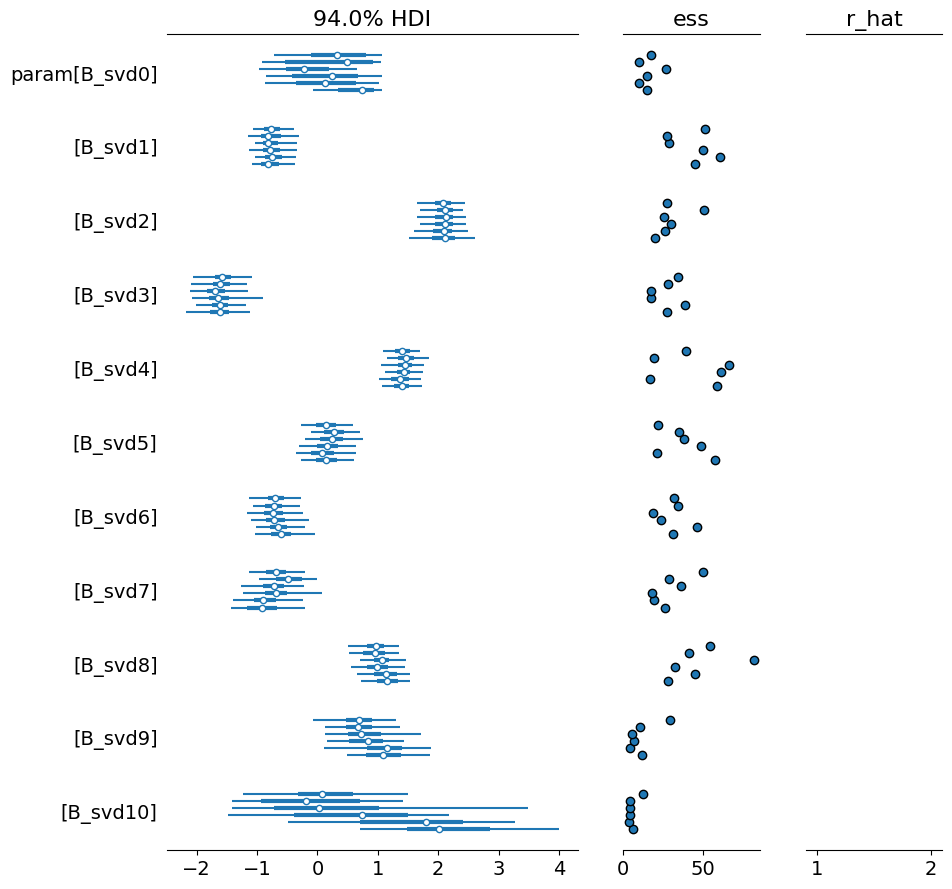

In [67]:
ax = az.plot_forest(
    post,
    # # var_names=["theta"],
    # figsize=(11.5, 5),
    # colors="C1",
    ess=True,
    coords=coords,
    backend='matplotlib',
    r_hat=True,
)

In [19]:
lp = post.sample_stats.lp.values
curves = []
for i in range(lp.shape[0]):
    curves.append(
        hv.Curve((draw, lp[i])).opts(alpha=0.6)
    )
a=hv.Overlay(curves)

a.opts(height=600, width=800)

:Overlay
   .Curve.I   :Curve   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
   .Curve.III :Curve   [x]   (y)
   .Curve.IV  :Curve   [x]   (y)
   .Curve.V   :Curve   [x]   (y)
   .Curve.VI  :Curve   [x]   (y)

In [21]:
plarr = post.posterior.sel(theta_id='B_svd10').to_array().values[0]
draw = np.arange(plarr.shape[1])

curves = []
for i in range(plarr.shape[0]):
    curves.append(
        hv.Curve((draw, plarr[i])).opts(alpha=0.6)
    )
a=hv.Overlay(curves)

a.opts(height=600, width=800)

:Overlay
   .Curve.I   :Curve   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
   .Curve.III :Curve   [x]   (y)
   .Curve.IV  :Curve   [x]   (y)
   .Curve.V   :Curve   [x]   (y)
   .Curve.VI  :Curve   [x]   (y)

In [17]:
# az.plot_trace(post, compact=False, combined=False, legend=True, coords={
#     'theta_id': ['B_svd0', 'B_svd1', 'B_svd2', 'B_svd3', 'B_svd4']
# })